# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('ggplot')

# Data extraction

In [4]:
df = pd.read_csv('mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Basic data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
# No use of Customer ID
df.drop(['CustomerID'], axis=1, inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Exploratory data analysis

## Gender column

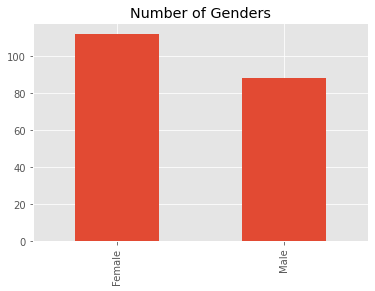

In [9]:
no_gender = df['Gender'].value_counts()

no_gender.plot(kind='bar')
plt.title('Number of Genders')
plt.show()

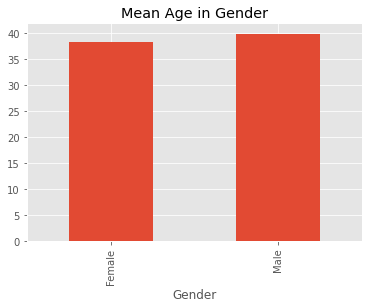

In [10]:
mean_age = df[['Gender', 'Age']].groupby('Gender').mean().reset_index()

mean_age.plot(kind='bar', x='Gender', y='Age',legend=None)
plt.title('Mean Age in Gender')
plt.show()

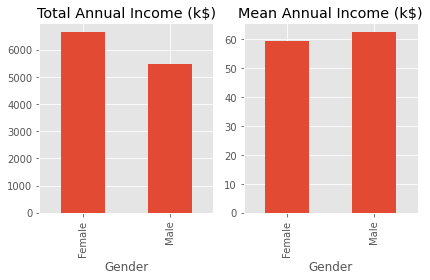

In [11]:
total_income = df[['Gender', 'Annual Income (k$)']].groupby('Gender').sum().reset_index()
mean_income = df[['Gender', 'Annual Income (k$)']].groupby('Gender').mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2)

total_income.plot(kind='bar', 
                  x='Gender', y='Annual Income (k$)', 
                  ax=axes[0], legend=None, 
                  title='Total Annual Income (k$)')

mean_income.plot(kind='bar', 
                 x='Gender', y='Annual Income (k$)', 
                 ax=axes[1], legend=None, 
                 title='Mean Annual Income (k$)')

plt.tight_layout()
plt.show()

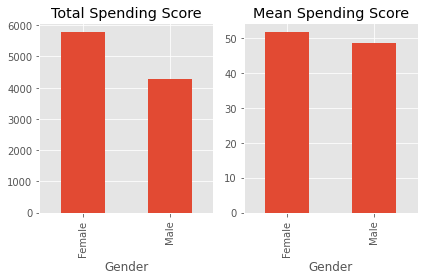

In [12]:
total_score = df[['Gender', 'Spending Score (1-100)']].groupby('Gender').sum().reset_index()
mean_score = df[['Gender', 'Spending Score (1-100)']].groupby('Gender').mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2)

total_score.plot(kind='bar', 
                 x='Gender', y='Spending Score (1-100)', 
                 ax=axes[0], legend=None, 
                 title='Total Spending Score')

mean_score.plot(kind='bar', 
                x='Gender', y='Spending Score (1-100)', 
                ax=axes[1], legend=None, 
                title='Mean Spending Score')

plt.tight_layout()
plt.show()

## Age column

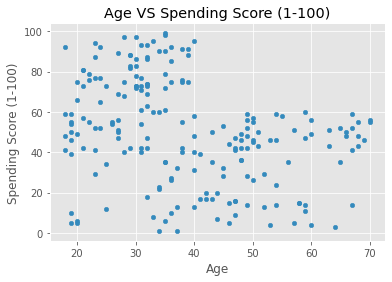

In [13]:
age_score = df[['Age', 'Spending Score (1-100)']]

age_score.plot(kind='scatter',
               x='Age', y='Spending Score (1-100)', 
               legend=None, 
               title='Age VS Spending Score (1-100)')

plt.show()

## Annual income column

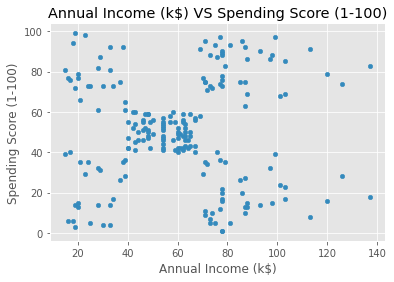

In [14]:
score_income = df[['Annual Income (k$)', 'Spending Score (1-100)']]

score_income.plot(kind='scatter',
                  x='Annual Income (k$)', y='Spending Score (1-100)', 
                  legend=None, 
                  title='Annual Income (k$) VS Spending Score (1-100)')

plt.show()

## Univariate analysis

In [15]:
gender_mapping = {"Male": 1 , "Female": 0}
df['Gender'] = df['Gender'].map(gender_mapping)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


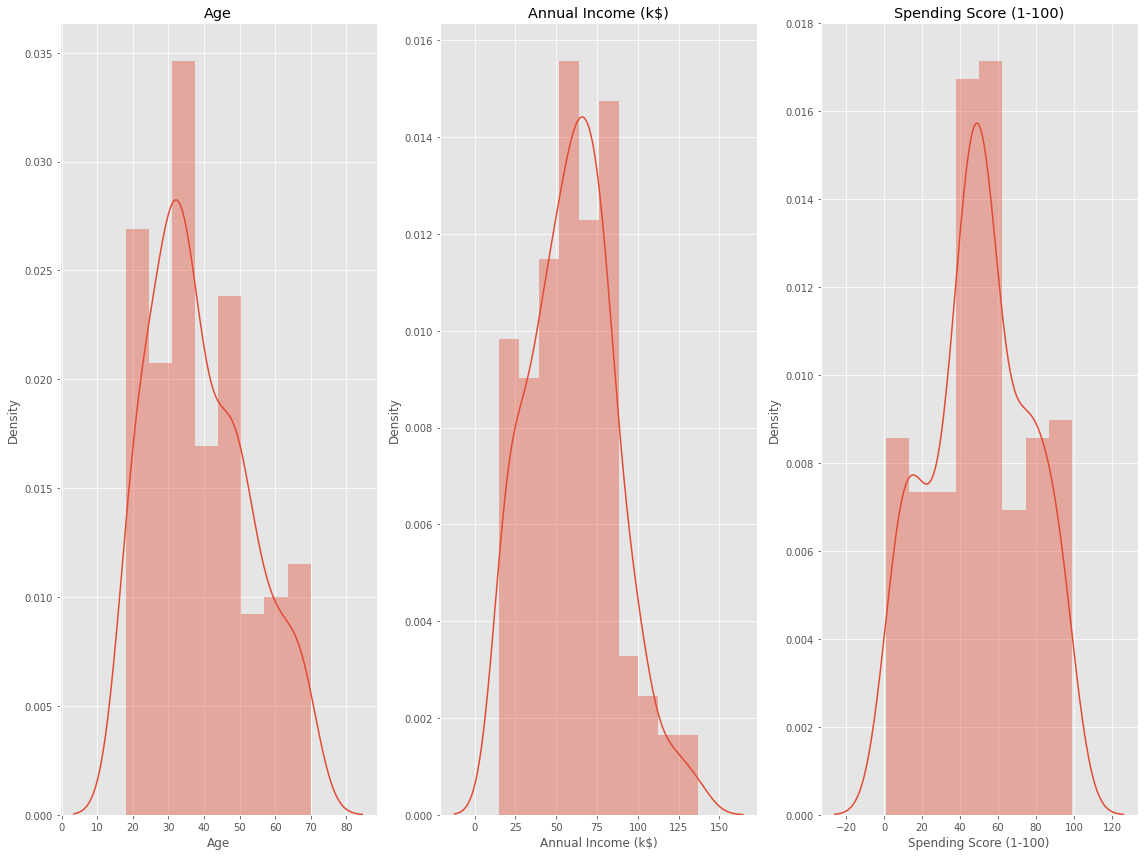

In [16]:
plt.figure(figsize=(16,12))

plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')

plt.subplot(1,3,3)
sns.distplot(df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')

plt.tight_layout()
plt.show()

## PCA analysis

In [17]:
X = np.array(df)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
pca.fit(X)

X_2D = pca.transform(X)

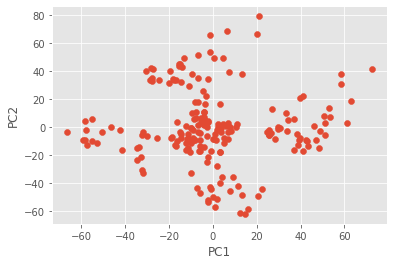

In [20]:
plt.scatter(x=X_2D[:,0], y=X_2D[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Clustering algorithm

In [21]:
from sklearn.cluster import KMeans

## Elbow method

In [22]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_2D)
    
    wcss.append(kmeans.inertia_)

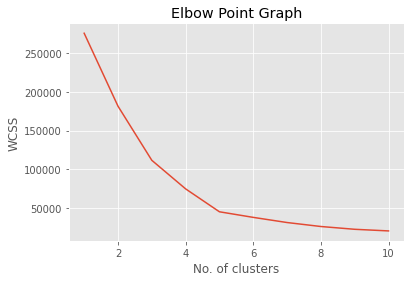

In [23]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

## Best model

In [24]:
best_model = KMeans(n_clusters=5, init='k-means++')
best_model.fit(X_2D)

KMeans(n_clusters=5)

In [25]:
Y = best_model.predict(X_2D)

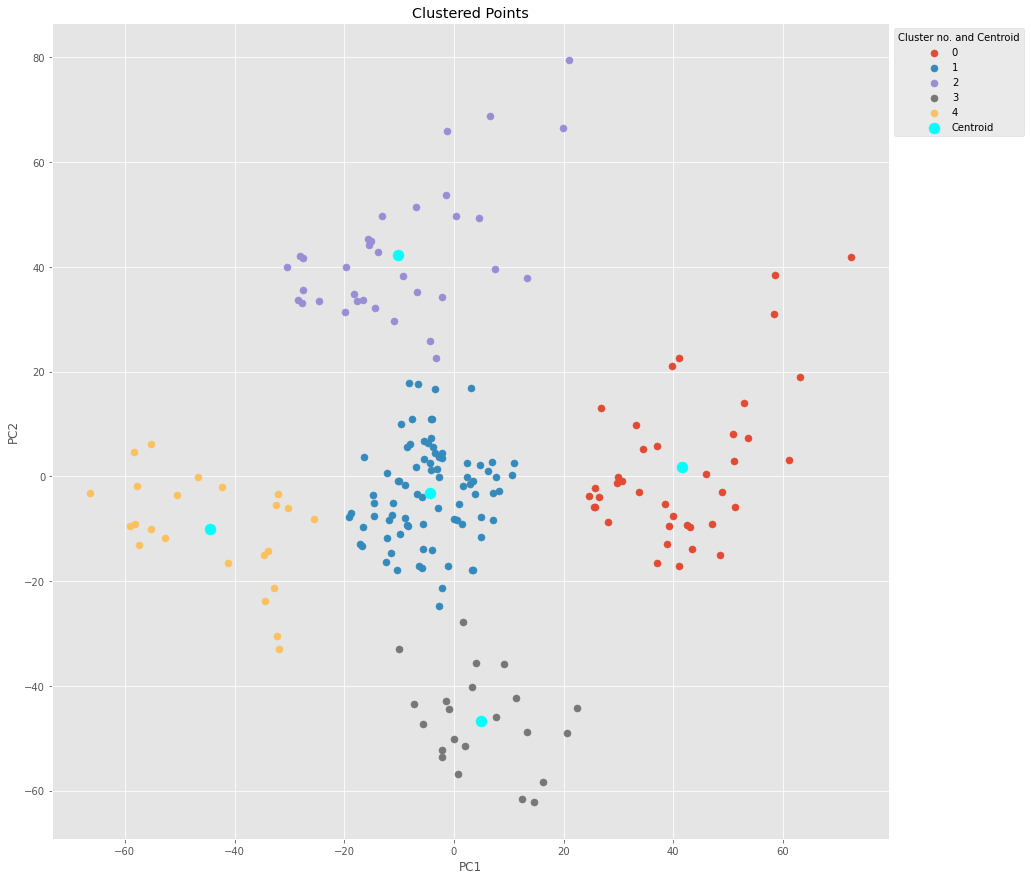

In [26]:
plt.figure(figsize=(15,15))

for i in range(5):
    plt.scatter(X_2D[Y==i, 0], X_2D[Y==i,1], s=50, label=str(i))

    
x_center = best_model.cluster_centers_[:,0]
y_center = best_model.cluster_centers_[:,1]
plt.scatter(x_center, y_center, s=120, c='cyan', label='Centroid')

plt.title('Clustered Points')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster no. and Centroid', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Saving models

In [27]:
import joblib

In [28]:
file = open('customer_segmentation.pkl', 'wb')
joblib.dump(best_model, file)

In [29]:
file = open('PCA.pkl', 'wb')
joblib.dump(pca, file)